In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path = "Data_ccr/par_set_1_psd/trun4/" ## -------> Nskip = 4
path = "../mc2/Test_Data/trun5_1/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
print(nn)
# Vt_up = Alldata[0:nn,0]
T_up = Alldata[0:nn,0]
# Es_up = Alldata[:,9]
# Js_up = Alldata[:,10]
R_up = Alldata[0:nn,7]

print(T_up)

# nn = 36

(50, 11)
50
[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08 1.12
 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64 1.68
 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]


In [4]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())



{'g6': 0.5, 'g4': -1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 1, 'tloop': True, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 3.5, 'Rload': 1.0, 'nwarm': 500000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.4, 'seed': 8588523, 'maxE': 20.4, 'nmeas': 16384, 'dTb': 0.04, 'dE': 0.4, 'minT': 0.04, 'Tcrit': 1.32, 'maxT': 2.04, 'minE': 0.4}


(50, 4, 16384) (50, 16384)


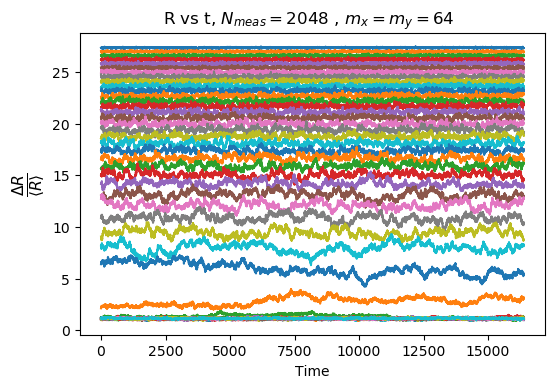

In [6]:
# NP = 2
nmeas = 16384

# NP = 1
# nmeas = 32768

# NP = 8
# nmeas = 4096

NP = 4
# nmeas = 8192

# NP = 16
# nmeas = 2048

kk = 0
Tdata = []
dRData = []
for i in range(nn):
    tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
    tdata = tdata.reshape((NP,nmeas))
    R0 = np.mean(tdata,axis=1)
    R0 = R0.reshape((NP,1))
    R0 = np.dot(R0,np.ones((1,nmeas)))
#     print(R0)
    delR = tdata - R0
    Tdata.append(tdata)
    dRData.append(delR[kk,:]/R0[kk,:])
#     plt.plot(delR[kk,:]/R0[kk,:] , label = "Vt = " + format(Vt_up[i], '.2f') )
#     if T_up[i] > 0.5 and T_up[i] < 0.7:
    plt.plot(tdata[kk,:], label = "Vt = " + format(T_up[i], '.2f') )


    
Tdata = np.array(Tdata)
RData = Tdata[:,kk,:]
dRData = np.array(dRData)
print(np.shape(Tdata), np.shape(dRData))
plt.xlabel("Time")
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
# plt.ylabel("R")
# # plt.ylim(0,10)
# plt.legend()
plt.title("R vs t, $N_{meas} = 2048$ , $m_x = m_y = 64$  ")
# # plt.savefig(path+"Rvt.pdf")
plt.show()

7 19 29 31 49


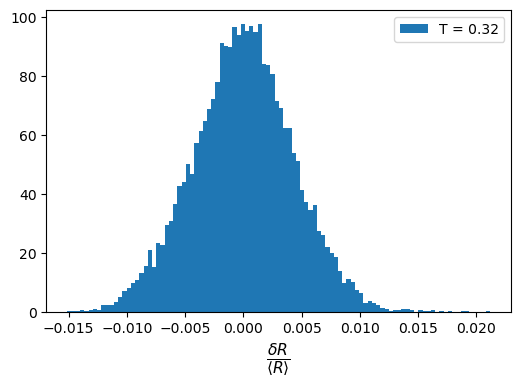

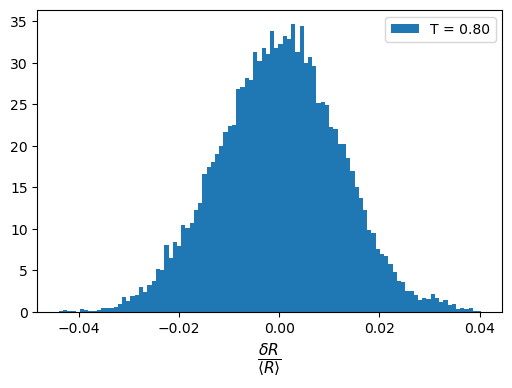

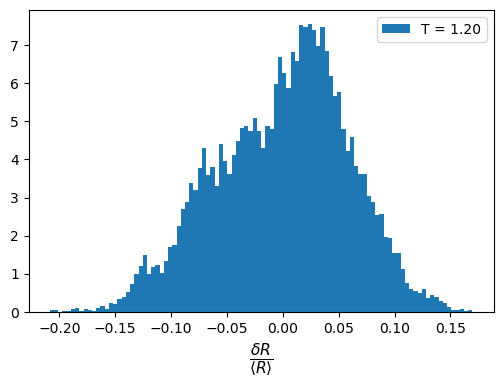

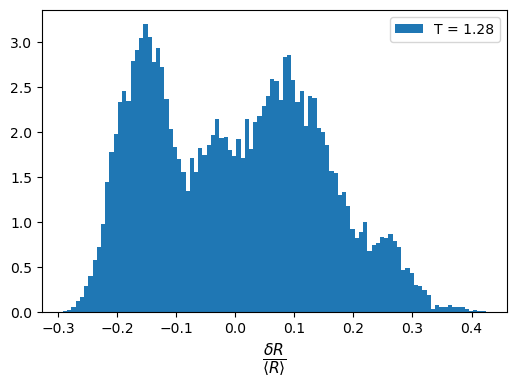

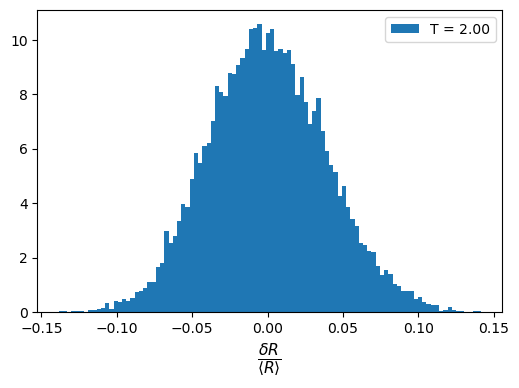

In [8]:
# print(T_up)
Tcrit = 1.3
k1 = int(np.argwhere((T_up*10.) == 3.2))  #### ----> 0.24Tc
k2 = int(np.argwhere((T_up*10.) == 8.0)) #### ----> 0.75Tc
k3 = int(np.argwhere((T_up*10.) == 12.0)) #### ----> 0.9Tc 
k4 = int(np.argwhere((T_up*10.) == 12.8)) #### ----> 0.97Tc
k5 = int(np.argwhere((T_up*10.) == 20.0)) #### ----> 1.2Tc
print(k1,k2,k3,k4,k5)
karr = np.array([k1,k2,k3,k4,k5])

# Tcrit = 0.6
# k1 = int(np.argwhere((T_up*10.) == 2.0))
# k2 = int(np.argwhere((T_up*10.) == 4.0))
# k3 = int(np.argwhere((T_up*10.) == 5.))
# k4 = int(np.argwhere((T_up*10.) == 5.4))
# # k4 = k3+1
# k5 = int(np.argwhere((T_up*10.) == 8.0))
# print(k1,k2,k3,k4,k5)
# karr = np.array([k1,k2,k3,k4,k5])



for kk in karr:
    plt.figure()
#     _, bins1, _ = plt.hist(Tdata[kk,0,:],bins=100, density=True, label = "T = " + format(T_up[kk], '.2f'))
    _, bins1, _ = plt.hist(dRData[kk,:],bins=100, density=True, label = "T = " + format(T_up[kk], '.2f'))
    mu1, sigma1 = stats.norm.fit(dRData[kk,:])
    best_fit_line1 = stats.norm.pdf(bins1, mu1, sigma1)
    # print(best_fit_line)    
#     plt.plot(bins1, best_fit_line1, color = 'black')
    # plt.xlabel("Time")
    plt.xlabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
#     plt.xlim(-0.2,0.2)
    plt.legend()
#     plt.savefig(path+'hist_cc'+format(T_up[kk], '.2f')+'_.pdf',bbox_inches='tight')

plt.show()    